In this demonstration, we are showcasing polynomial interpolation techniques, specifically Newton's polynomial interpolation and Lagrange interpolation. We utilize a set of data points obtained from the trigonometric function y=sin⁡(x) in the range 0, π/2, discretized at x=0, π/6, π/3, π/2​. 

The algorithmic functions used for Newton's divided differences and coefficient calculations are adapted from materials available at Python Numerical Methods https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html. These data points are employed to construct interpolating polynomials using both Newton's and Lagrange's interpolation methods. The resulting interpolating polynomials are then graphed alongside the original data points. This visualization enables us to compare the accuracy and behavior of the interpolating polynomials generated by the two methods. 

The source of the data used in this demonstration is the trigonometric function y=sin⁡(x), commonly studied in mathematics and readily available in scientific literature and computational environments.

In [5]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

[ 1.         -0.25587263 -0.42320992  0.1138719 ]
[ 1.         -0.25587263 -0.42320992  0.1138719 ]
Here is our Lagrange interpolating polynomial:
        3          2
0.1139 x - 0.6021 x + 0.02816 x + 1

Here is our Newton interpolating polynomial:
        3          2
0.1139 x - 0.4232 x - 0.2559 x + 1



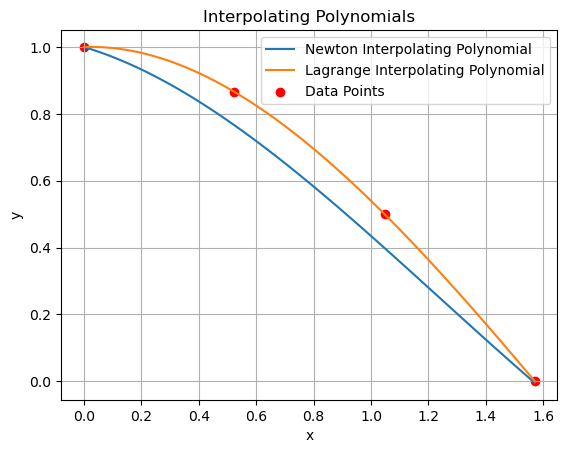

In [6]:
# func from https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y  
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])           
    return coef

def coeff(x, y):
    n = len(x)
    arr = y.copy()
    for i in range(1, n):
        arr[i:n] = (arr[i:n] - arr[i - 1]) / (x[i:n] - x[i - 1])
    return arr   

# 1st range
x_values = np.array([0, np.pi/6, np.pi/3, np.pi/2], float)
y_values = np.array([1, np.sqrt(3)/2, 1/2, 0], float)

print(coeff(x_values, y_values))
print(divided_diff(x_values, y_values)[0,:])

# Show polynomials
newton_coefficients = divided_diff(x_values, y_values)[0,:]
newton = np.poly1d(newton_coefficients[::-1])
lagrange_poly = lagrange(x_values, y_values)
print(f"Here is our Lagrange interpolating polynomial:\n{lagrange_poly}\n")
print(f"Here is our Newton interpolating polynomial:\n{newton}\n")

# Plot the interpolating polynomials
x_range = np.linspace(0, np.pi/2, 100)  # Define the range of x-values for plotting
plt.plot(x_range, newton(x_range), label="Newton Interpolating Polynomial")
plt.plot(x_range, lagrange_poly(x_range), label="Lagrange Interpolating Polynomial")
plt.scatter(x_values, y_values, color='red', label="Data Points")  # Plot the data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolating Polynomials')
plt.legend()
plt.grid(True)
plt.show()


Primary code source, without the graph: https://stackoverflow.com/questions/66819423/must-plot-of-newton-interpolation-polynomial-match-completely-the-plot-of-origin

## Analysis

The difference in the behavior of Lagrange and Newton interpolating polynomials can be attributed to the fundamental differences in how these interpolation methods work.

### Lagrange Interpolation:
        Lagrange interpolation constructs a single polynomial that passes through all given data points by multiplying each data point by a corresponding Lagrange basis polynomial and summing them up.
        The Lagrange basis polynomials have oscillatory behavior, which can lead to the Lagrange interpolating polynomial exhibiting oscillations between data points, especially when the data points are not uniformly spaced.
        As a result, the Lagrange polynomial can have a curve that points towards the upper right or exhibits oscillatory behavior, depending on the arrangement of the data points.

### Newton Interpolation:
        Newton interpolation, on the other hand, constructs a polynomial using a divided differences table, where each row of the table corresponds to a term in the polynomial.
        Newton's polynomial interpolation tends to produce a smoother curve, especially when the degree of the polynomial is kept low, because it does not involve explicit multiplication of basis polynomials like Lagrange interpolation does.
        The resulting polynomial often approximates the data points more closely and appears as an almost perfect straight line between adjacent data points, particularly when the data points are evenly spaced.

Therefore, the differences in the behavior of the Lagrange and Newton interpolating polynomials arise from their underlying mathematical formulations and the computational techniques used to generate them.